Accuracy Score:  0.6875

Confusion Matrix
 [[6 3]
 [2 5]]
Feature Importance: [Color, size, age, act][0.23092881 0.24163131 0.1301273  0.39731259]
|--- feature_3 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: T
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: T
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: T
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: T
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: T
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: F
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: F
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: F
|--- feature_3 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   

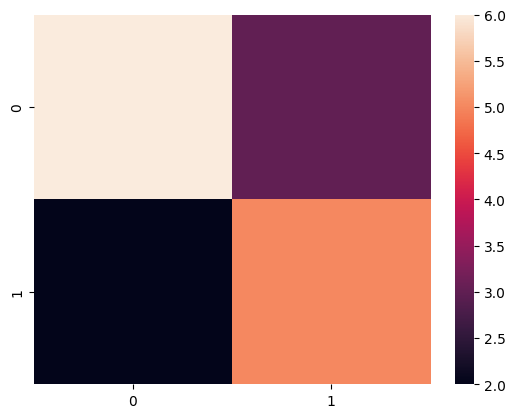

In [31]:
'''Exercise 1
Given the following data set: balloons.csv, use a Decision Tree Classifier to predict whether a
balloon is inflated or not. Compute the accuracy score of the model and print the classification
report as well as the Confusion Matrix both in text and as a heatmap (use test_size=0.2). In
addition, print the most important features. Finally, create a visualization of the decision tree
Note 1: Use the following lines of code to produce a decision tree visualization:
import graphviz
dot_data=tree.export_graphviz(dtree, out_file=None, feature_names=featureNames, class_names=lbl,
filled=True)
graph = graphviz.Source(dot_data, format=’png’)
graph.render(’balloons_dt’, view=True)
where: dtree=name of model, feature_names=[’Color’, ’size’, ’age’, ’act’], class_names=[’F’, ’T’]
Note 2: You can create a text representation of a decision tree using:
text_representation = tree.export_text(dtree)
print(text_representation)'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/balloons.csv')
for i in range(len(df)):
  if df['Color'][i]=='YELLOW':
    df['Color'][i]=0
  else:
    df['Color'][i]=1
  if df['size'][i]=='SMALL':
    df['size'][i]=0
  else:
    df['size'][i]=1
  if df['act'][i]=='STRETCH':
    df['act'][i]=0
  else:
    df['act'][i]=1
  if df['age'][i]=='ADULT':
    df['age'][i]=0
  else:
    df['age'][i]=1
X = np.array(df.iloc[:, 0:4])
y = np.array(df.iloc[:, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
print ('Accuracy Score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))
print(f'Feature Importance: [Color, size, age, act]{DT.feature_importances_}')
dot_data=tree.export_graphviz(DT, out_file=None, feature_names=['Color', 'size', 'age', 'act'], class_names=['F', 'T'], filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('balloons_dt', view=True)
text_representation = tree.export_text(DT)
print(text_representation)
sns.heatmap(confusion_matrix(y_test, pred))
plt.show()